# Analysis of Crime in Each Maryland County Based on Education Spending Per Student, Median Household Income, and Unemployment Rate

Diego Ferreira, Lillian Mueller, Ananya Uniyal

May 16th, 2022

Introduction/Overview of the Tutorial

Crime rates vary vastly between different regions. Certain areas are commonly known to be more dangerous and have higher rates of crime than other areas. This tutorial aims to analyze these regional differences in crime by looking at the crime rate in each county in Maryland. Furthermore, this tutorial aims to classify the factors that contribute to this variation in crime from county to county. We chose to look at factors that determine the wealth of a county and see if this can predict crime rate. Household median income is a major predictor of wealth in a county and was one of the main factors we used. Another factor we used was education spending per student. We predicted that this factor could also determine the wealth of a county and how much money they had to spend on education and whether that influenced crime rate. The last factor we looked at was the unemployment rate.

This project also aims to determine which factor is the best predictor of crime and whether combining multiple factors in the data analysis leads to better predictions of crime rate. We hope these predictions can be used to motivate government policies such as increasing the amount of education spending per county, providing benefits/support to decrease unemployment rate, etc. The data is analyzed from the years 2017-2019. This is due to limited availability in government datasets for recent years. Additionally, we wanted to avoid any outliers/misleading data due to the Covid pandemic. 

The first step of this tutorial is to extract data from various government databases and websites. The next step is to clean this data and reformat it. Then the data is plotted to determine any trends. Next, a linear regression learning algorithm is applied to see whether crime rate can be predicted on any one factor or a combination of factors. Lastly, the insights of analysis of crime in Maryland counties is discussed with respect to the three factors mentioned. 

We used various python packages in our code to assist with data analysis and machine learning. 

Description of the packages used:

- Pandas was used to modify data frames and tabular data. 
- Numpy was used to work with numerical data. 
- Matplotlib was used to plot various graphs and perform exploratory analysis. 
- Seaborn was another package used for statistical data visualization. 
- Sklearn was a package used for predictive data analysis and machine learning. With this package the data was trained to create a model and then test data was used to determine how accurate the model was. 
- Statsmodels was used to estimate various statistical models. 
- Sklearn metrics was used to determine the accuracy of our machine learning algorithm. 

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# All packages used in the tutorial
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np

import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

from sklearn.metrics import r2_score

import folium
import json

# Step 1: Data Collection/Curation and Parsing

Step one focuses on collecting data from various sites. Here we will be reading in csv files from different databases as well as scraping some websites for data. 

The first step here is to download the csv from the Maryland's Open Data Portal (https://opendata.maryland.gov/Public-Safety/Violent-Crime-Property-Crime-by-County-1975-to-Pre/jwfa-fdxs). This dataset contains the violent and property crimes committed in Maryland by county in the years 1975 to Present (the data is only available up to 2019). Crime is divided into different categories:

1. Murder
2. Rape
3. Robbery
4. Aggravated Assault
5. Breaking and Entering
6. Larceny Theft
7. Motor Vehicle theft

The population of each county is also given for each year. We will be looking at crime rates per capita to generalize crime rates over all counties. 

Access the crime data for each county by going to the State of Maryland Open Data Portal here (https://opendata.maryland.gov/Public-Safety/Violent-Crime-Property-Crime-by-County-1975-to-Pre/jwfa-fdxs). Click on "Export" on the upper right corner and download the data as a CSV. Use the pandas read_csv function (more information here: https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) to read in the data as a dataframe. 

In [3]:
# CRIME DATA

# read csv file uploaded on github
crime_data = pd.read_csv("https://raw.githubusercontent.com/lgmueller/lgmueller.github.io/main/Violent_Crime___Property_Crime_by_County__1975_to_Present%20(2).csv")

# contains raw data
crime_data.head()

JURISDICTION  YEAR  POPULATION  MURDER  RAPE  ROBBERY  AGG. ASSAULT  \
0  Allegany County  1975       79655       3     5       20           114   
1  Allegany County  1976       83923       2     2       24            59   
2  Allegany County  1977       82102       3     7       32            85   
3  Allegany County  1978       79966       1     2       18            81   
4  Allegany County  1979       79721       1     7       18            84   

   B & E  LARCENY THEFT  M/V THEFT  ...  B & E PER 100,000 PEOPLE  \
0    669           1425         93  ...                     839.9   
1    581           1384         73  ...                     692.3   
2    592           1390        102  ...                     721.1   
3    539           1390        100  ...                     674.0   
4    502           1611         99  ...                     629.7   

   LARCENY THEFT PER 100,000 PEOPLE  M/V THEFT PER 100,000 PEOPLE  \
0                            1789.0                         116.8   
1                            1649.1                          87.0   
2                            1693.0                         124.2   
3                            1738.2                         125.1   
4                            2020.8                         124.2   

   MURDER  RATE PERCENT CHANGE PER 100,000 PEOPLE  \
0                                             NaN   
1                                           -36.7   
2                                            53.3   
3                                           -65.8   
4                                             0.3   

   RAPE RATE PERCENT CHANGE PER 100,000 PEOPLE  \
0                                          NaN   
1                                        -62.0   
2                                        257.8   
3                                        -70.7   
4                                        251.1   

   ROBBERY RATE PERCENT CHANGE PER 100,000 PEOPLE  \
0                                             NaN   
1                                            13.9   
2                                            36.3   
3                                           -42.2   
4                                             0.3   

   AGG. ASSAULT  RATE PERCENT CHANGE PER 100,000 PEOPLE  \
0                                                NaN      
1                                              -50.9      
2                                               47.3      
3                                               -2.2      
4                                                4.0      

   B & E RATE PERCENT CHANGE PER 100,000 PEOPLE  \
0                                           NaN   
1                                         -17.6   
2                                           4.2   
3                                          -6.5   
4                                          -6.6   

   LARCENY THEFT  RATE PERCENT CHANGE PER 100,000 PEOPLE  \
0                                                NaN       
1                                               -7.8       
2                                                2.7       
3                                                2.7       
4                                               16.3       

   M/V THEFT  RATE PERCENT CHANGE PER 100,000 PEOPLE  
0                                                NaN  
1                                              -25.5  
2                                               42.8  
3                                                0.7  
4                                               -0.7  

[5 rows x 38 columns]

This crime dataset contains crime data from 1975-2019 for each Maryland county. This crime data is separated into various categories including Murder, Rape, Robbery, Aggrevated Assult, Breaking and Entering, Larceny Theft, and Motorvechile theft. The crime rate per 100,000 people is also given. 

Next get the median household income data. To access the data go to the State of Maryland Open Data Portal here (https://opendata.maryland.gov/Demographic/Maryland-Median-Household-Income-By-Year-With-Marg/bvk4-qsxs) and click "Export" on the upper right corner to download the data as a CSV. Use the pandas read_csv function (more information here: https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) to read in the data as a dataframe. 

In [4]:
# MEDIAN HOUSEHOLD INCOME DATA

# Read CSV for median household income 
income_data = pd.read_csv("https://raw.githubusercontent.com/lgmueller/lgmueller.github.io/main/Maryland_Median_Household_Income_By_Year_With_Margin_Of_Error__2010-2019%20(1).csv")

# Raw data from Open Data Portal
income_data.head()

Date created  Year    Data  MARYLAND  Allegany County  \
0  September 29, 2020  2010  Income     68933            37083   
1  September 29, 2020  2010     MOE       833             2826   
2  September 29, 2020  2011  Income     70075            38504   
3  September 29, 2020  2011     MOE       760             2693   
4  September 29, 2020  2012  Income     71169            38670   

   Anne Arundel County  Baltimore City  Baltimore County  Calvert County  \
0                80908           38186             62300           86536   
1                 2311            1414              2006            5064   
2                82980           38478             62309           88406   
3                 3430            1536              1728            4369   
4                87083           39077             62413           87215   

   Caroline County  ...  Kent County  Montgomery County  \
0            55480  ...        49017              88559   
1             2965  ...         4582               2710   
2            50809  ...        49795              92288   
3             4213  ...         4603               2758   
4            48772  ...        49969              94365   

   Prince George's County  Queen Anne's County  Somerset County  \
0                   69524                78503            38134   
1                    1609                 5181             2747   
2                   70114                75158            35426   
3                    1911                 6363             3426   
4                   69258                79012            34454   

   St. Mary's County  Talbot County  Washington County  Wicomico County  \
0              81559          56806              51610            47702   
1               5070           3948               3327             3097   
2              80943          55145              52028            45788   
3               2717           4929               2928             3582   
4              85478          61529              52604            50204   

   Worcester County  
0             55492  
1              3507  
2             48472  
3              4653  
4             55875  

[5 rows x 28 columns]

This dataset contains the median household income for each county for the years 2010-2019. Each year and county also has Margin of Error data. These rows are not necessary and will be removed in the next step. 

Next upload the data for education spending per student for each county in Maryland. This data can be found at the following links (scroll down to the bottom of the page to find the Local Funding for Public Schools): 

- 2018 - https://conduitstreet.mdcounties.org/2018/02/21/chart-compares-school-funding-per-student-county-by-county/
- 2019 - https://conduitstreet.mdcounties.org/2019/02/20/funding-per-pupil-charts-for-2019/

Data on funding per student was very difficult to find. After extensive searching we were only able to find data for the years 2018 and 2019. 

In [5]:
# LOCAL EDUCATION FUNDING PER PUPIL

# Read CSV for median household income 
funding_data = pd.read_csv("https://raw.githubusercontent.com/lgmueller/lgmueller.github.io/main/Local%20Funding%20for%20Public%20Schools%20Per%20Pupil.csv")
funding_data.head()

County  Year  Local Funding Per Pupil
0   Worcester County  2018                    13256
1  Montgomery County  2018                    10599
2      Howard County  2018                    10321
3        Kent County  2018                     9236
4      Talbot County  2018                     8621

This dataset shows the local funding per pupil/student for each county in Maryland (for the years 2018 and 2019).

Next, we will get the unemployment information for each county in maryland for the years 2017-2019. This website (https://msa.maryland.gov/msa/mdmanual/01glance/economy/html/unemployrates.html#:~:text=In%20March%202022%2C%20Maryland%27s%20unemployment,civilian%20population%20number%2C%20was%2065.6) contains unemployment percentages in tables for each county in Maryland. 

We use the pandas read_html function (more information here: https://pandas.pydata.org/docs/reference/api/pandas.read_html.html) to read in the HTML code on the webpage. Read_html will allow us to read in tables from the webpage and easily put the unemployment data into a dataframe.

In [6]:
# UNEMPLOYMENT RATES 

tables = pd.read_html('https://msa.maryland.gov/msa/mdmanual/01glance/economy/html/unemployrates.html#:~:text=In%20March%202022%2C%20Maryland%27s%20unemployment,civilian%20population%20number%2C%20was%2065.6') 
# Returns list of all tables on page

# Step 2: Data Management and Representation

The next step will be to format the data into a more convenient form for data analysis. This part of the data science pipeline involves cleaning up the data, getting rid of unnecessary information included in the raw dataframe, and transforming the data to contain the values we need for analysis.  

The first part of this step is to clean up the violent crime data. We need to ensure that this data is readable and compatible with the other three data sets (spending per student, median household income, and unemployment rates) since we need to be able to compare them for our data analysis. 

First we only extract years 2017, 2018, and 2019 from the dataset since these are our years of interest. Next we remove all the unnecessary columns from the dataset ('PERCENT CHANGE', 'VIOLENT CRIME TOTAL', 'VIOLENT CRIME PERCENT', 'VIOLENT CRIME PERCENT CHANGE', 'PROPERTY CRIME TOTALS', 'PROPERTY CRIME PERCENT', 'PROPERTY CRIME PERCENT CHANGE', 'POPULATION', 'MURDER', 'RAPE', 'ROBBERY', 'AGG. ASSAULT', 'B & E', 'LARCENY THEFT', 'M/V THEFT', and 'GRAND TOTAL'). The remaining columns we have in this dataset are: 

- JURISDICTION (county names) 
- YEAR 
- OVERALL CRIME RATE PER 100,000 PEOPLE

In [7]:
# Cleaning up violent crime data

# only looking at years 2017, 2018, 2019
years = [2017, 2018, 2019]
# create separate dataframes for crime in 2017, 2018, and 2019
crime_17 = crime_data[crime_data.YEAR.eq(2017)]
crime_18 = crime_data[crime_data.YEAR.eq(2018)]
crime_19 = crime_data[crime_data.YEAR.eq(2019)]

# merge all three dataframes
crime_df = pd.concat([crime_17, crime_18, crime_19])

# only keep first 19 columns of the dataframe since this is the only relevant information needed
crime_df = crime_df.iloc[:, :19]

# remove the percent change and individual crime total columns since this data is not needed for our analysis
crime_df = crime_df.drop(columns = ['PERCENT CHANGE', 'VIOLENT CRIME TOTAL', 'VIOLENT CRIME PERCENT', 'VIOLENT CRIME PERCENT CHANGE', 'PROPERTY CRIME TOTALS', 'PROPERTY CRIME PERCENT', 'PROPERTY CRIME PERCENT CHANGE'])

# reset dataframe index so it starts at 0
crime_df = crime_df.reset_index(level=None, drop=False, inplace=False, col_level=0, col_fill='')

# drop unecesary columns 
crime_df = crime_df.drop(columns=['POPULATION', 'MURDER', 'RAPE', 'ROBBERY', 'AGG. ASSAULT', 'B & E', 
                                  'LARCENY THEFT', 'M/V THEFT', 'GRAND TOTAL'])
crime_df.head()

index         JURISDICTION  YEAR  OVERALL CRIME RATE PER 100,000 PEOPLE
0     40      Allegany County  2017                                 3467.1
1     87  Anne Arundel County  2017                                 2450.1
2    132       Baltimore City  2017                                 7033.7
3    177     Baltimore County  2017                                 3402.1
4    222       Calvert County  2017                                 1155.2

Next we clean up the median household income raw dataframe. We do this by removing the margin on error rows. This information is not necessary and should be cleaned out of the dataset. Furthermore, in order to be consistent with the crime dataframe which has county names as rows rather than columns we transpose the dataframe (more information here: https://pandas.pydata.org/pandas-docs/version/0.25.0/reference/api/pandas.DataFrame.T.html). Now the median household income dataframe also contains county names in the rows rather than the columns. The following columns are in the income_df (median household income dataframe): 

- County 
- Year
- Income

In [8]:
# MEDIAN HOUSEHOLD INCOME DATA CLEANUP

# remove all margin of error rows 
income_df = income_data[income_data['Data'] == 'Income']
income_df

# remove "Data" "MARYLAND", AND "Date Created" columns

income_df = income_df.drop(columns = ['Date created', 'Data', 'MARYLAND'])


# only keep rows for years 2017, 2018, and 2019
income_17 = income_df[income_df['Year'] == 2017]
income_18 = income_df[income_df['Year'] == 2018]
income_19 = income_df[income_df['Year'] == 2019]

# transpose data frame so county names are rows (similar to violent crime data frame) 
income_17 = income_17.T
# delete year column
income_17 = income_17.iloc[1:, :]
# rename column to income
income_17.rename(columns = {14:'Income'}, inplace = True)
# add year column 
income_17 = income_17.assign(Year='2017')[['Year'] + income_17.columns.tolist()]

# transpose data frame so county names are rows (similar to violent crime data frame) 
income_18 = income_18.T
# delete year column
income_18 = income_18.iloc[1:, :]
# rename column to income
income_18.rename(columns = {16:'Income'}, inplace = True)
# add year column 
income_18 = income_18.assign(Year='2018')[['Year'] + income_18.columns.tolist()]

# transpose data frame so county names are rows (similar to violent crime data frame) 
income_19 = income_19.T
# delete year column
income_19 = income_19.iloc[1:, :]
# rename column to income
income_19.rename(columns = {18:'Income'}, inplace = True)
# add year column 
income_19 = income_19.assign(Year='2019')[['Year'] + income_19.columns.tolist()]

# merge all three dataframes
income_df = pd.concat([income_17, income_18, income_19])
income_df.reset_index(inplace=True)
income_df.rename(columns = {'index':'County'}, inplace = True)

income_df.head()

County  Year  Income
0      Allegany County  2017   42564
1  Anne Arundel County  2017   96133
2       Baltimore City  2017   46762
3     Baltimore County  2017   73309
4       Calvert County  2017  100000

Next, we clean up the funding per student dataframe. Here we just need to sort the funding values by year and county so they are in the correct order and match the rest of the dataframes we will be comparing this to. The columns in the funding data frame are: 

- County
- Year
- Local Funding Per Pupil


In [9]:
# FUNDING DATA CLEANUP

# sort data by county and year
funding_data = funding_data.sort_values(by=['Year', 'County'])
# reset index so it starts at 0
funding_data.reset_index(inplace=True)
funding_df = funding_data
# drop index column 
funding_df = funding_df.drop(columns = ['index'])

funding_df.head()

County  Year  Local Funding Per Pupil
0      Allegany County  2018                     3714
1  Anne Arundel County  2018                     8431
2       Baltimore City  2018                     3645
3     Baltimore County  2018                     7208
4       Calvert County  2018                     7808

The last dataframe we need to clean up is the unemployment rate data for each county. We read in the table from the html code from the Maryland Government Website (https://msa.maryland.gov/msa/mdmanual/01glance/economy/html/unemployrates.html#:~:text=In%20March%202022%2C%20Maryland%27s%20unemployment,civilian%20population%20number%2C%20was%2065.6). Then we create a dataframe with county, year, and unemployment rate columns and input the data from the table on the website into our dataframe. This is done by iterating through all the rows in the table and placing the corresponding information in the dataframe we created. We create a dataframe for each year and then merge the data so it is consistent with the other dataframes. The columns in this dataframe are: 

- County
- Year
- UnemploymentRate

In [10]:
# UNEMPLOYMENT RATE DATA CLEANUP 

# Access the unemployment data in Maryland’s state website by calling pandas function read_html (more information here 
# https://pandas.pydata.org/docs/reference/api/pandas.read_html.html), this will return all the information from the site. 
# Now we need to clean it. read_html can return all the information from the website, including datatables if they have 
# been originally inserted as a table. In this case the tables were present so we can just access them through the tables
# list and it should return the tables in the order they appear in the website, in this case we want the second table 
# from the site (years 2015-2019). If the tables were purely text then you would have to go through the html information 
# and look for specific markers to determine where the data is and then place these points into a dataframe. 

tables = pd.read_html('https://msa.maryland.gov/msa/mdmanual/01glance/economy/html/unemployrates.html#:~:text=In%20March%202022%2C%20Maryland%27s%20unemployment,civilian%20population%20number%2C%20was%2065.6') 
table1 = tables[1]

# This returned a table in a format that was unusual to work in (data in multiple columns for one county). 
# So we decided to clean the table into a format that would be easy to access by columns and therefore easy to graph.
table1.drop(index = 0, inplace = True)

unemploy_17 = pd.DataFrame(columns = ["County", "Year", "UnemploymentRate"])
unemploy_18 = pd.DataFrame(columns = ["County", "Year", "UnemploymentRate"])
unemploy_19 = pd.DataFrame(columns = ["County", "Year", "UnemploymentRate"])

# Loop over the table and select specific years (2017-2019) then merge all three dataframes to have a single 
# dataframe containing all the data.

#Tranfering unemployment data from 2017 table to dataframe
for row, val in table1.iterrows():
    unemploy_17.loc[row, "County"] = val[0]
    unemploy_17.Year = 2017
    unemploy_17.loc[row, "UnemploymentRate"] = float(val[3].rstrip(val[3][-1]))
unemploy_17.drop(index= 1, inplace = True)
unemploy_17.reset_index(inplace = True)
unemploy_17.drop(columns = ["index"], inplace = True)

#Tranfering unemployment data from 2018 table to dataframe
for row, val in table1.iterrows():
    unemploy_18.loc[row, "County"] = val[0]
    unemploy_18.Year = 2018
    unemploy_18.loc[row, "UnemploymentRate"] = float(val[4].rstrip(val[4][-1]))
unemploy_18.drop(index= 1, inplace = True)
unemploy_18.reset_index(inplace = True)
unemploy_18.drop(columns = ["index"], inplace = True)

#Tranfering unemployment data from 2019 table to dataframe
for row, val in table1.iterrows():
    unemploy_19.loc[row, "County"] = val[0]
    unemploy_19.Year = 2019
    unemploy_19.loc[row, "UnemploymentRate"] = float(val[5].rstrip(val[5][-1]))
unemploy_19.drop(index= 1, inplace = True)
unemploy_19.reset_index(inplace = True)
unemploy_19.drop(columns = ["index"], inplace = True)

# merge all three dataframes
unemploy_df = pd.concat([unemploy_17, unemploy_18, unemploy_19])

# drop rows with overall Maryland 
unemploy_df = unemploy_df.loc[unemploy_df['County'] != "Maryland"]

# change types of data 
unemploy_df['UnemploymentRate'] = unemploy_df['UnemploymentRate'].astype('float64')

# return the first few entries of the dataframe (unemployment in 2017)
unemploy_df.head()

County  Year  UnemploymentRate
1      Allegany County  2017               5.7
2  Anne Arundel County  2017               3.5
3       Baltimore City  2017               6.1
4     Baltimore County  2017               4.3
5       Calvert County  2017               3.6

# Part 3: Exploratory Data Analysis

For the Exploratory Data Analysis section we will plot all the data to see if we can visualize any trends. We will plot crime trends and median household income over the years (2017-2019) for each county. Furthermore, we will look at how crime rate relates to each factor (crime rate vs funding, crime rate vs. income, crime rate vs. employment). These graphs will provide us insight on how various factors affect crime rate and allow us to determine if there is a correlation or not. 

The first graph we plot is the overall crime rate over the years (2017-2019). We use matlabplotlib to plot these graphs (more info here: https://matplotlib.org/3.5.0/api/_as_gen/matplotlib.pyplot.plot.html). To plot this graph, get the crime rate from 2017-2019 for each county. Then, plot this trend overtime. Each county in the graph will be a different color. 

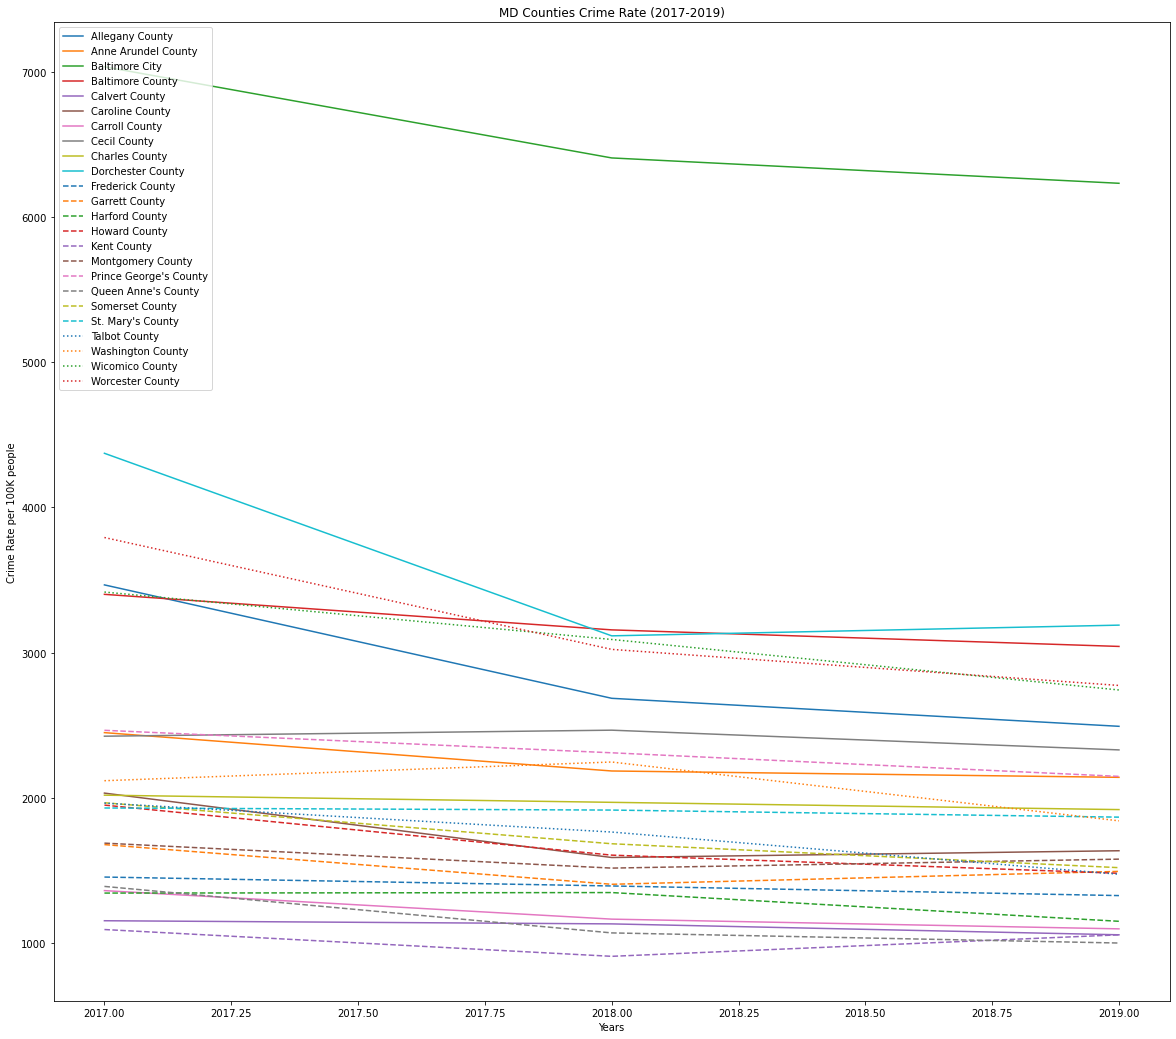

In [11]:
# Plot years vs overall crime rate

years = [2017, 2018, 2019]
county_names = crime_df.JURISDICTION.unique()
county_names_first_10 = county_names[0 : 10]
county_names_middle_10 = county_names[10 : 20]
repeat_county = ['Talbot County', 'Washington County', 'Wicomico County', 'Worcester County']

plt.figure(figsize=(20,18))
for curr_county in county_names_first_10:
    # dataframe for current county data
    curr_county_crime = crime_df[crime_df['JURISDICTION'] == curr_county]
    
    # turn data from dataframe into array to plot
    curr_years = curr_county_crime['YEAR'].to_numpy()
    curr_crime = curr_county_crime['OVERALL CRIME RATE PER 100,000 PEOPLE'].to_numpy()
    plt.title('MD Counties Crime Rate (2017-2019)')
    plt.xlabel('Years')
    plt.ylabel('Crime Rate per 100K people')
    plt.plot(curr_years, curr_crime, label = curr_county)
    
for curr_county in county_names_middle_10:
    # dataframe for current county data
    curr_county_crime = crime_df[crime_df['JURISDICTION'] == curr_county]
    
    # turn data from dataframe into array to plot
    curr_years = curr_county_crime['YEAR'].to_numpy()
    curr_crime = curr_county_crime['OVERALL CRIME RATE PER 100,000 PEOPLE'].to_numpy()
    plt.title('MD Counties Crime Rate (2017-2019)')
    plt.xlabel('Years')
    plt.ylabel('Crime Rate per 100K people')
    plt.plot(curr_years, curr_crime, linestyle='dashed')
    
    
for curr_county in repeat_county:
    # dataframe for current county data
    curr_county_crime = crime_df[crime_df['JURISDICTION'] == curr_county]
    
    # turn data from dataframe into array to plot
    curr_years = curr_county_crime['YEAR'].to_numpy()
    curr_crime = curr_county_crime['OVERALL CRIME RATE PER 100,000 PEOPLE'].to_numpy()
    plt.title('MD Counties Crime Rate (2017-2019)')
    plt.xlabel('Years')
    plt.ylabel('Crime Rate per 100K people')
    plt.plot(curr_years, curr_crime, linestyle='dotted')
    
plt.legend(county_names, loc = "upper left")
plt.show()

There appears to be a slight downward trend in crime rates for some of the counties (such as Baltimore County and Carroll County). Baltimore County and Dorchester County have significant downward trends in their crime rates from 2017 to 2018. Otherwise, crime remains pretty constant over the years for most counties. The counties with the highest crime rates are Baltimore City, Dorchester County, and Baltimore County. The counties with the lowest crime rates are Kent County, Queen Anne's County, and Calvert County.

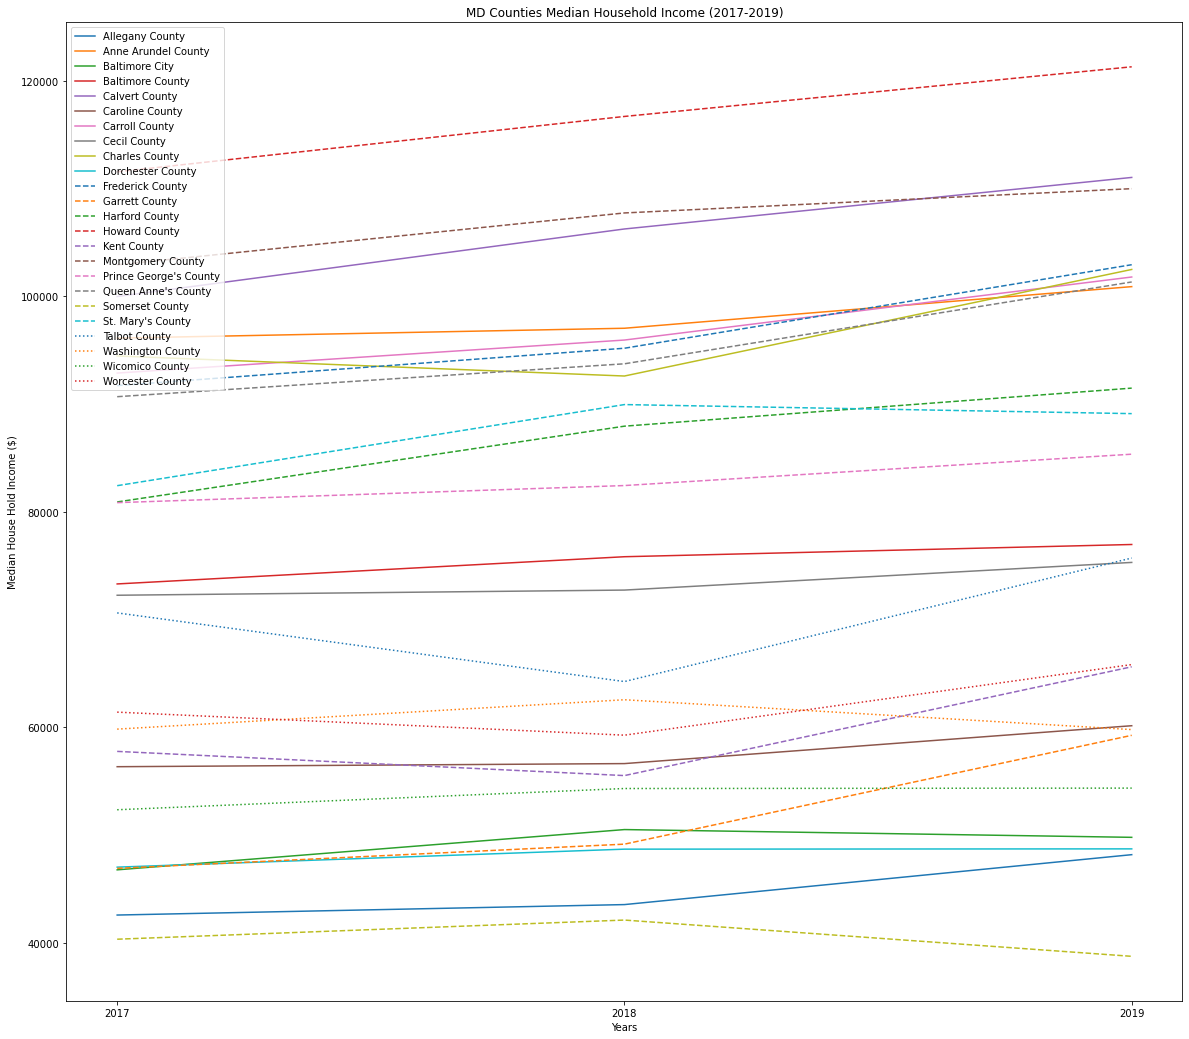

In [12]:
# Plot years vs median household income

years = [2017, 2018, 2019]
county_names = income_df.County.unique()
county_names_first_10 = county_names[0 : 10]
county_names_middle_10 = county_names[10 : 20]
repeat_county = ['Talbot County', 'Washington County', 'Wicomico County', 'Worcester County']


plt.figure(figsize=(20,18))
for curr_county in county_names_first_10:
    # dataframe for current county data
    curr_county_income = income_df[income_df['County'] == curr_county]
    
    # turn data from dataframe into array to plot
    curr_years = curr_county_income['Year'].to_numpy()
    curr_income = curr_county_income['Income'].to_numpy()
    plt.title('MD Counties Median Household Income (2017-2019)')
    plt.xlabel('Years')
    plt.ylabel('Median House Hold Income ($)')
    plt.plot(curr_years, curr_income, label = curr_county)
    
for curr_county in county_names_middle_10:
    # dataframe for current county data
    curr_county_income = income_df[income_df['County'] == curr_county]
    
    # turn data from dataframe into array to plot
    curr_years = curr_county_income['Year'].to_numpy()
    curr_income = curr_county_income['Income'].to_numpy()
    plt.title('MD Counties Median Household Income (2017-2019)')
    plt.xlabel('Years')
    plt.ylabel('Median House Hold Income ($)')
    plt.plot(curr_years, curr_income, linestyle='dashed')
    
for curr_county in repeat_county:
    # dataframe for current county data
    curr_county_income = income_df[income_df['County'] == curr_county]
    
    # turn data from dataframe into array to plot
    curr_years = curr_county_income['Year'].to_numpy()
    curr_income = curr_county_income['Income'].to_numpy()
    plt.title('MD Counties Median Household Income (2017-2019)')
    plt.xlabel('Years')
    plt.ylabel('Median House Hold Income ($)')
    plt.plot(curr_years, curr_income, linestyle='dotted')
    
plt.legend(county_names, loc = "upper left")
plt.show()

There is no overarching trend in this graph. However, some counties have a slight upward positive trend in the median household income over the years (for example Calvert County and Howard County). Other counties have no apparent trend since they increase one year and decrease the next. The median household income remains about the same for each county. The counties with the highest median household income are Howard County, Montgomery County, and Calvert County. The counties with the lowest median household income are Somerset County, Allegheny County, Dorchester County, and Baltimore City. 

In the previous graph we saw that Baltimore City and Dorchester County had the highest crime rates and this graph shows they have the lowest median household income. This suggests a correlation between the crime rates and household income. Furthermore, Calvert County was among the counties with the lowest crime rates and this graph shows that it had one of the highest median household incomes. This further suggest a correlation between crime rates and household income. 

# The Hypothesis
After light visualization of the data, we hypothesize that education spending, median household income, and unemployment are good predictors of crime rates in a county. Therefore, when considering these factors: 
1. If a county's unemployment rate decreases, the crime rate will likely decrease. 
2. If the median household income increases, the crime rate will likely decrease. 
3. If a county's education spending increases, the crime rate will likely decrease.

In order to test these hypotheses, we will be analyzing how well a trend line can be fit to the data. In this case, the null hypothesis is that there is no relationship between the individual factors and crime rate. The alternative hypothesis is that there is a correlation between the individual factors and crime rate. 

# Crime Rate vs Median Household Income 
In this section we will test the relationship between median household income and the crime rate within each county in Maryland. We will begin by creating a dataframe that aligns the crime rate data with the median household income data from each county for the years 2017, 2018, and 2019. We will then create a scatter plot of these points and create a line of best fit to better visualize the data and the relationship between these two variables. 

In [13]:
# Combine crime and income dataframes 
crime_df['INCOME'] = income_df['Income']

crime_df.head()

index         JURISDICTION  YEAR  OVERALL CRIME RATE PER 100,000 PEOPLE  \
0     40      Allegany County  2017                                 3467.1   
1     87  Anne Arundel County  2017                                 2450.1   
2    132       Baltimore City  2017                                 7033.7   
3    177     Baltimore County  2017                                 3402.1   
4    222       Calvert County  2017                                 1155.2   

   INCOME  
0   42564  
1   96133  
2   46762  
3   73309  
4  100000

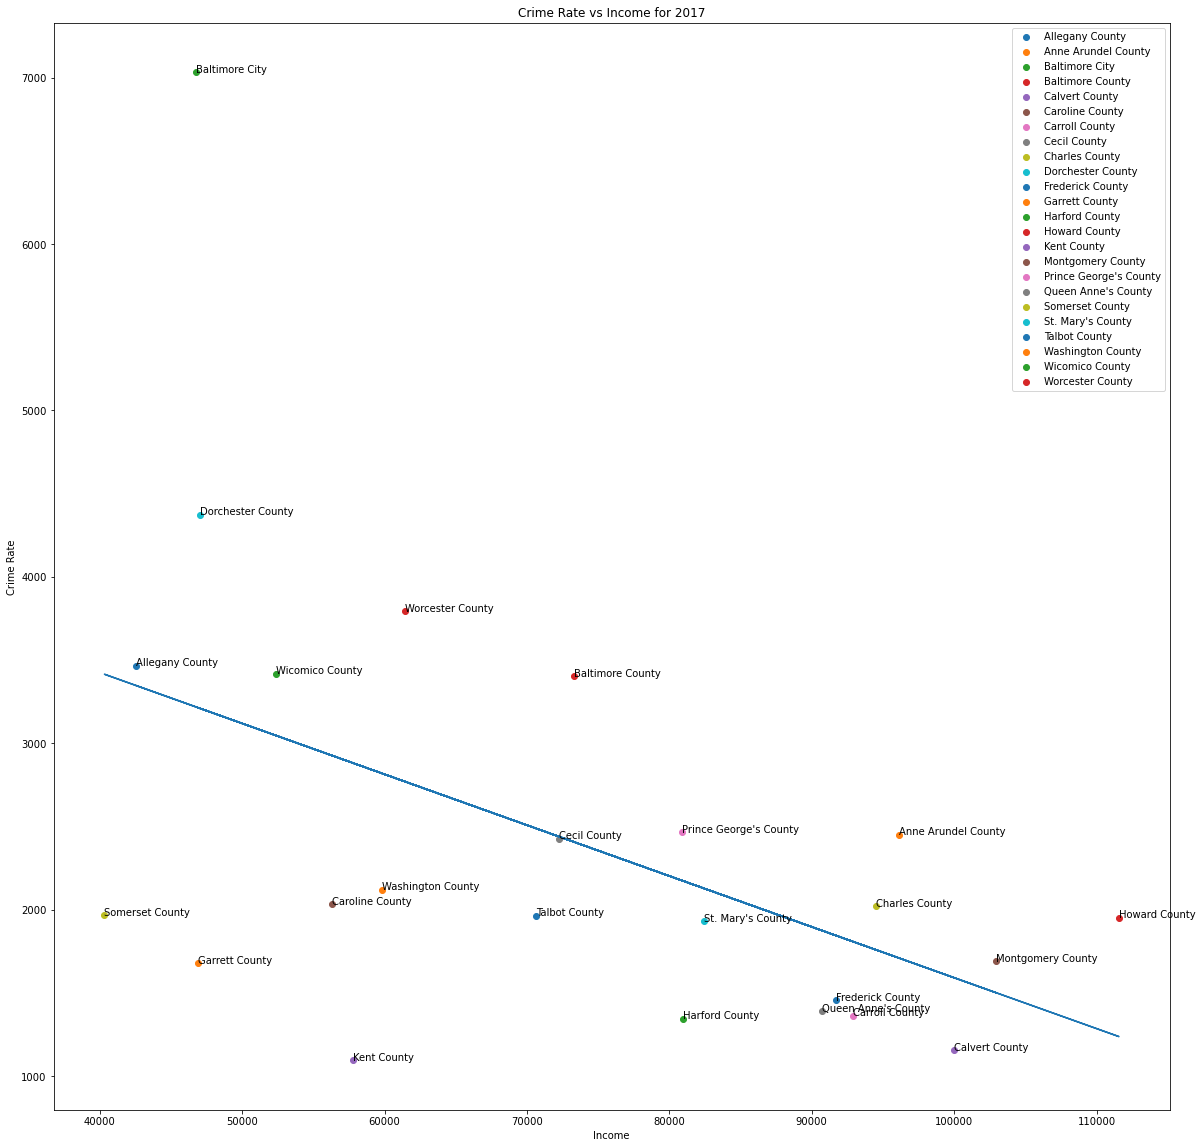

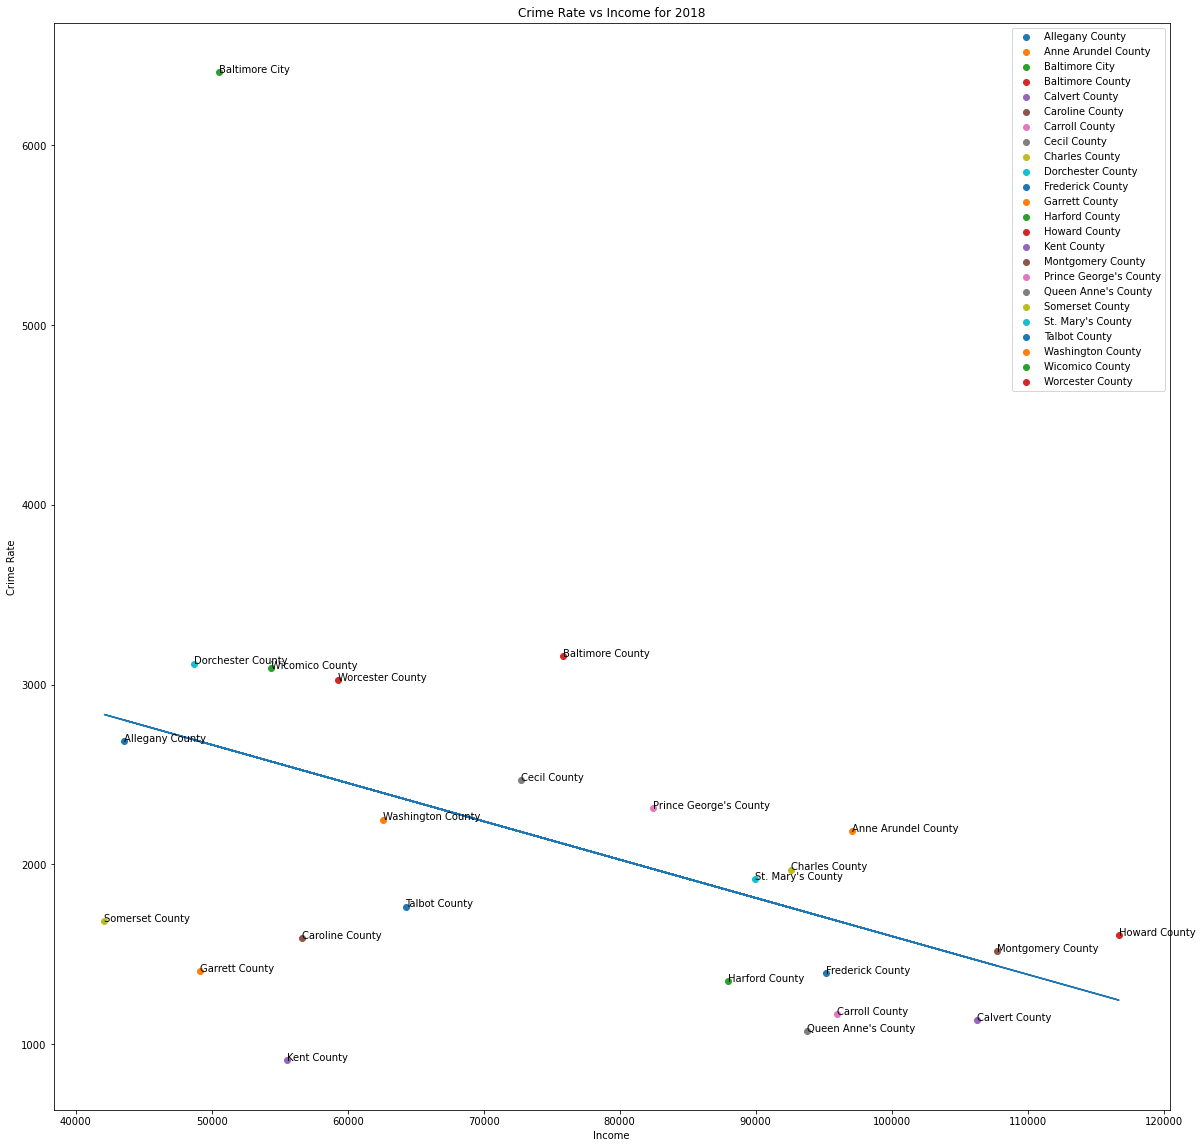

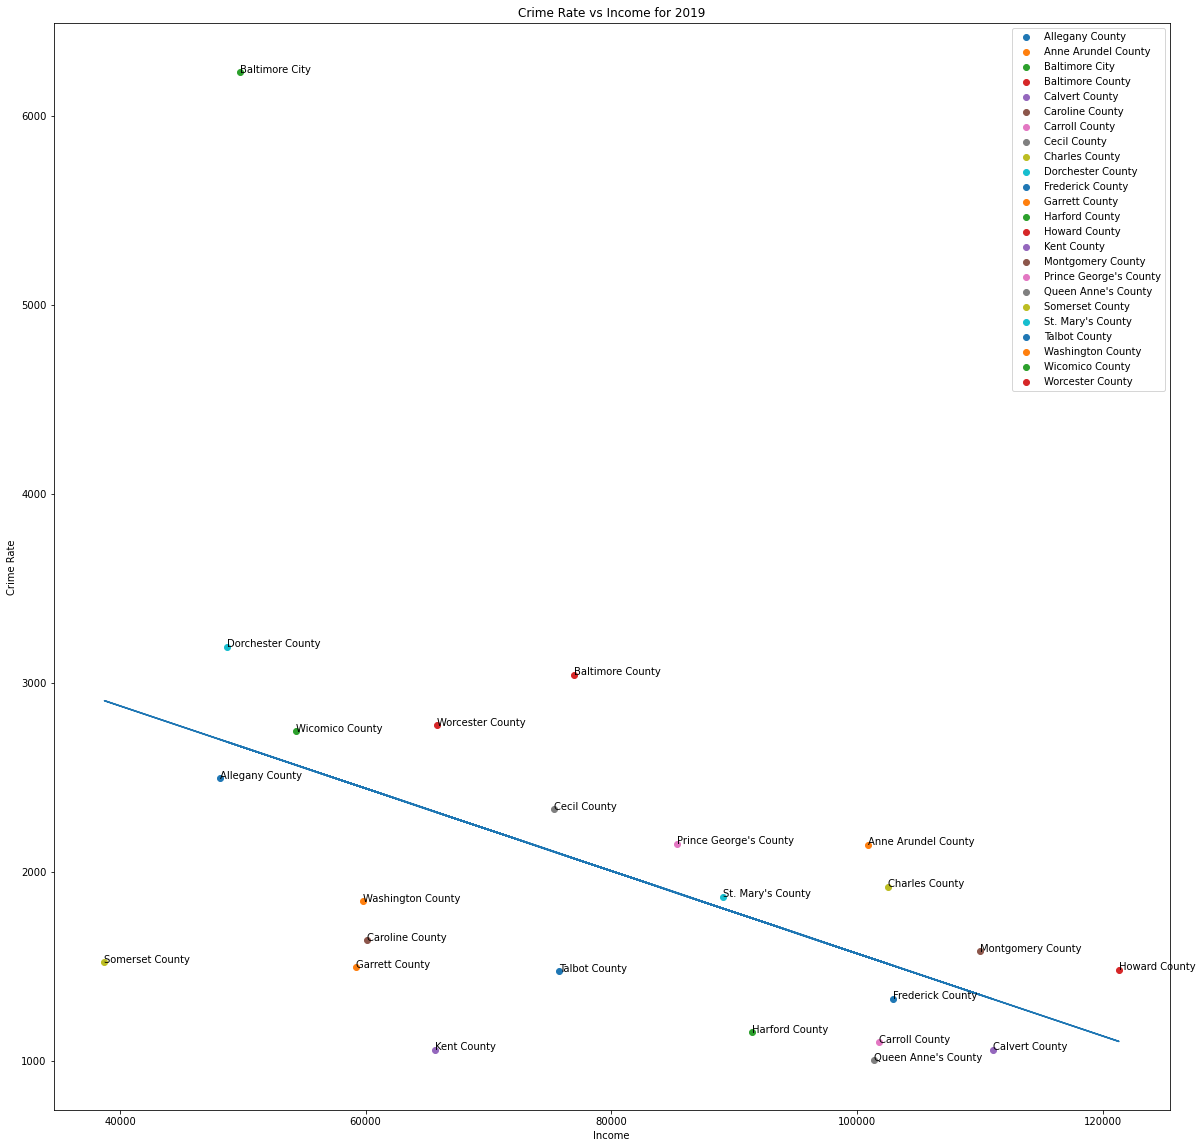

In [14]:
# Get graph of crime rate vs income per year
by_year = crime_df.groupby(crime_df['YEAR'])

index = 0   # must keep track of overall index in dataframe
for year in years: 
    group = by_year.get_group(year)
    plt.figure(figsize=(20, 20))
    
    # create scatter plot for year 
    for i in range(index, index+len(group)):
        plt.scatter(group['INCOME'][i], group['OVERALL CRIME RATE PER 100,000 PEOPLE'][i])
        plt.annotate(group['JURISDICTION'][i], (group['INCOME'][i], group['OVERALL CRIME RATE PER 100,000 PEOPLE'][i]))
    index = index + len(group)
    plt.xlabel('Income')
    plt.ylabel('Crime Rate')
    plt.legend(group['JURISDICTION'])
    plt.title("Crime Rate vs Income for " + str(year))
    
    # add linear regression 
    z = np.polyfit(group['INCOME'], group['OVERALL CRIME RATE PER 100,000 PEOPLE'], 1)
    linReg = np.poly1d(z)
    plt.plot(group['INCOME'], linReg(group['INCOME']), '-')
    plt.show()

Above are graphs depicting the relationship between the County's median income and its crime rate separated by year. Over the past years 2017, 2018, and 2019, one can see an overall trend. As the median household income increases, the crime rate in that county decreases. In order to further analyze this data, we will test the model via the Pearson Correlation method. This analytical method measures the linear dependance between the two variables. 

In [15]:
# Get graph of crime rate vs income per year
by_year = crime_df.groupby(crime_df['YEAR'])

# for each year, analyze the relationship trend
for year in years: 
    group = by_year.get_group(year)
    
    # render statistical analysis of regression
    x = group['INCOME'].values.reshape(-1,1)
    y = group['OVERALL CRIME RATE PER 100,000 PEOPLE'].values.reshape(-1,1)
    reg = LinearRegression()
    reg.fit(x, y)
    print( '\033[1m' + "\nThe linear model for Crime rate vs Income in " + str(year) + " is:" + '\033[0m') 
    print("Y = {:.5} + {:.5}X".format(reg.intercept_[0], reg.coef_[0][0]))
    X2 = sm.add_constant(x)
    est = sm.OLS(y, X2)
    est2 = est.fit()
    print(est2.summary())


The linear model for Crime rate vs Income in 2017 is:
Y = 4647.1 + -0.030559X
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.249
Model:                            OLS   Adj. R-squared:                  0.215
Method:                 Least Squares   F-statistic:                     7.298
Date:                Sun, 15 May 2022   Prob (F-statistic):             0.0130
Time:                        16:35:17   Log-Likelihood:                -202.54
No. Observations:                  24   AIC:                             409.1
Df Residuals:                      22   BIC:                             411.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------

Here we used the python's statsmodel library to run the correlation analysis. Above is the summary for each graph. From the summaries, we are specifically looking at the r-squared value, the t value, and the p value. The r-squared value represents the proportion of the variance for a dependent variable that’s explained by an independent variable. For each year, the r-squared values were .249, .180, and .223 respectively. According to this value, only about a forth of the observed variation can be explained by the model. Using this value, r, we can then calculate the t value to evaluate the correlation between the variables. In the summaries, both the t and p values were calculated for each year. These values are for simple t tests where the null hypothesis that there is no correlation between the variables. The resulting p values were .013, .039, and .020 respectively. Therefore, on a 5% significance level, we can say that there is a correlation between the median household income and crime rate within the counties. 

to learn more about r-squared values and their meaning you can go to: 
https://www.investopedia.com/terms/r/r-squared.asp#:~:text=R%2Dsquared%20(R2),variables%20in%20a%20regression%20model.

to learn more about correlation methods go to: 
http://www.sthda.com/english/wiki/correlation-test-between-two-variables-in-r#:~:text=Correlation%20test%20is%20used%20to,calculated%20to%20answer%20this%20question.

# Crime Rate vs Local Spending 
In this section we will test the relationship between the county's local spending and the crime rate in Maryland. We will begin by creating a dataframe that aligns the crime rate data with the spending data from each county for the years 2018 and 2019 as in the previous section. We will then create a scatter plot of these points and create a line of best fit to better visualize the data and the relationship between these two variables. 

In [16]:
# combine crime and education spending dataframes 

# since funding df only has 2018 and 2019 data, remove 2017 from crime
crime_18_19 = crime_df.loc[crime_df['YEAR'] != 2017]
crime_18_19 = crime_18_19.reset_index(level=None, drop=False, inplace=False, col_level=0, col_fill='')

crime_18_19['FUNDING'] = funding_df['Local Funding Per Pupil']
# make sure rows align
crime_18_19['align funding'] = funding_df['County']==crime_18_19['JURISDICTION']

crime_18_19.head()

level_0  index         JURISDICTION  YEAR  \
0       24     41      Allegany County  2018   
1       25     88  Anne Arundel County  2018   
2       26    133       Baltimore City  2018   
3       27    178     Baltimore County  2018   
4       28    223       Calvert County  2018   

   OVERALL CRIME RATE PER 100,000 PEOPLE  INCOME  FUNDING  align funding  
0                                 2686.4   43535     3714           True  
1                                 2186.1   97051     8431           True  
2                                 6406.3   50501     3645           True  
3                                 3157.5   75836     7208           True  
4                                 1133.5  106270     7808           True

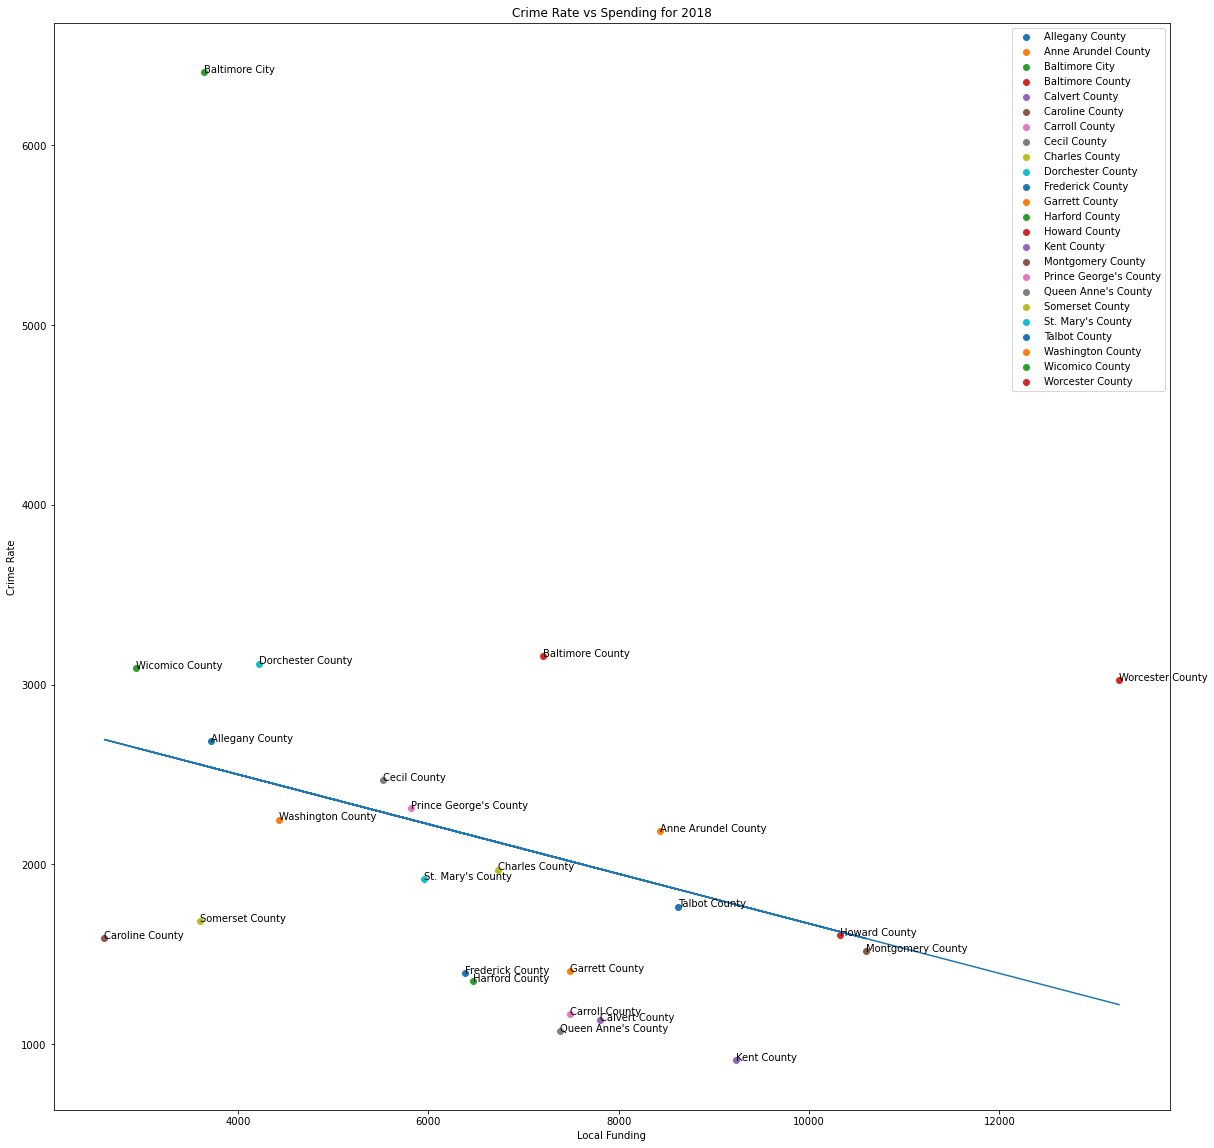

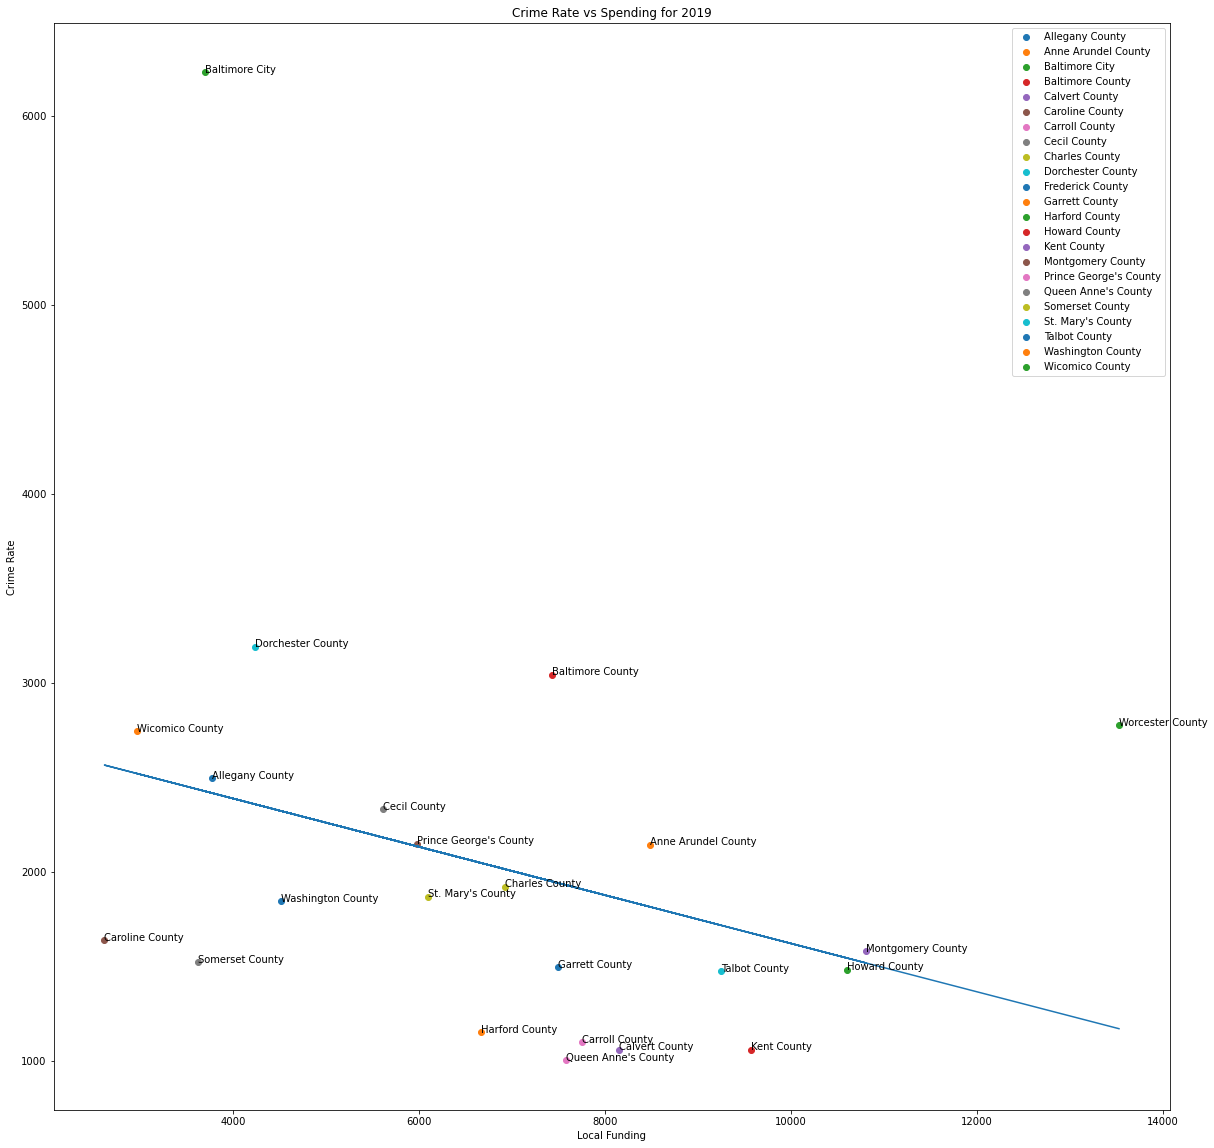

In [17]:
# Get graph of crime rate vs funding per year
by_year = crime_18_19.groupby(crime_18_19['YEAR'])

index = 0   # must keep track of overall index in dataframe
for year in [2018, 2019]: 
    group = by_year.get_group(year)
    plt.figure(figsize=(20, 20))
    for i in range(index, index+len(group)):
        if (group['align funding'][i]):
            plt.scatter(group['FUNDING'][i], group['OVERALL CRIME RATE PER 100,000 PEOPLE'][i])
            plt.annotate(group['JURISDICTION'][i], (group['FUNDING'][i], group['OVERALL CRIME RATE PER 100,000 PEOPLE'][i]))
    index = index + len(group)
    plt.xlabel('Local Funding')
    plt.ylabel('Crime Rate')
    plt.legend(group['JURISDICTION'])
    plt.title("Crime Rate vs Spending for " + str(year))
    
    # add linear regression 
    z = np.polyfit(group['FUNDING'], group['OVERALL CRIME RATE PER 100,000 PEOPLE'], 1)
    linReg = np.poly1d(z)
    plt.plot(group['FUNDING'], linReg(group['FUNDING']), '-')
    plt.show()

Above are graphs depicting the relationship between the County's local funding and its crime rate separated by year. Over the past years 2018 and 2019, one can see an overall trend. As the local spending per pupil increases, the crime rate in that county decreases. In order to further analyze this data, we will test the model via the Pearson Correlation method. This analytical method measures the linear dependance between the two variables.

In [18]:
# Get graph of crime rate vs funding per year
by_year = crime_18_19.groupby(crime_18_19['YEAR'])

# for each year, analyze the relationship trend
for year in [2018, 2019]:
    group = by_year.get_group(year)
    
    # render statistical analysis of regression
    x = group['FUNDING'].values.reshape(-1,1)
    y = group['OVERALL CRIME RATE PER 100,000 PEOPLE'].values.reshape(-1,1)
    reg = LinearRegression()
    reg.fit(x, y)
    print( '\033[1m' + "\nThe linear model for Crime rate vs Local Spending in " + str(year) + " is:" + '\033[0m') 
    print("Y = {:.5} + {:.5}X".format(reg.intercept_[0], reg.coef_[0][0]))
    X2 = sm.add_constant(x)
    est = sm.OLS(y, X2)
    est2 = est.fit()
    print(est2.summary())


The linear model for Crime rate vs Local Spending in 2018 is:
Y = 3053.2 + -0.13826X
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.102
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     2.505
Date:                Sun, 15 May 2022   Prob (F-statistic):              0.128
Time:                        16:35:21   Log-Likelihood:                -201.25
No. Observations:                  24   AIC:                             406.5
Df Residuals:                      22   BIC:                             408.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------

Again, we used the python's statsmodel library to run the correlation analysis. Above is the summary for each graph. From the summaries, we are specifically looking at the r-squared value, the t value, and the p value. For each year, the r-squared values were .102 and .100 respectively. According to this value, only about a tenth of the observed variation can be explained by the model. Using this value, r, we can then calculate the t value to evaluate the correlation between the variables. In the summaries, both the t and p values were calculated for each year. These values are for simple t tests where the null hypothesis that there is no correlation between the variables. The resulting p values were .128 and .132 respectively. Therefore, on a 5% significance level, we would say there is no correlation between crime rate and local funding alone. 

# Crime Rate vs Unemployment  
In this section we will test the relationship between the county's unemployment rate and the crime rate. We will begin by creating a dataframe that aligns the crime rate data with the unemployment data from each county for the years 2017, 2018, and 2019 as in the previous section. We will then create a scatter plot of these points and create a line of best fit to better visualize the data and the relationship between these two variables. 

In [19]:
# Combine crime and unemployment dataframes
unemploy_df = unemploy_df.rename(columns = {'County':'JURISDICTION'})
crime_df = pd.merge(crime_df, unemploy_df[['JURISDICTION', 'UnemploymentRate']], on='JURISDICTION', how="left")
crime_df = crime_df.rename(columns = {'UnemploymentRate':'UNEMPLOYMENT'})

# dropping duplicate rows and reset the indices
crime_df.drop_duplicates(subset=['JURISDICTION', 'YEAR'], inplace=True)
crime_df.reset_index(inplace=True)

crime_df.head()

level_0  index         JURISDICTION  YEAR  \
0        0     40      Allegany County  2017   
1        3     87  Anne Arundel County  2017   
2        6    132       Baltimore City  2017   
3        9    177     Baltimore County  2017   
4       12    222       Calvert County  2017   

   OVERALL CRIME RATE PER 100,000 PEOPLE  INCOME  UNEMPLOYMENT  
0                                 3467.1   42564           5.7  
1                                 2450.1   96133           3.5  
2                                 7033.7   46762           6.1  
3                                 3402.1   73309           4.3  
4                                 1155.2  100000           3.6

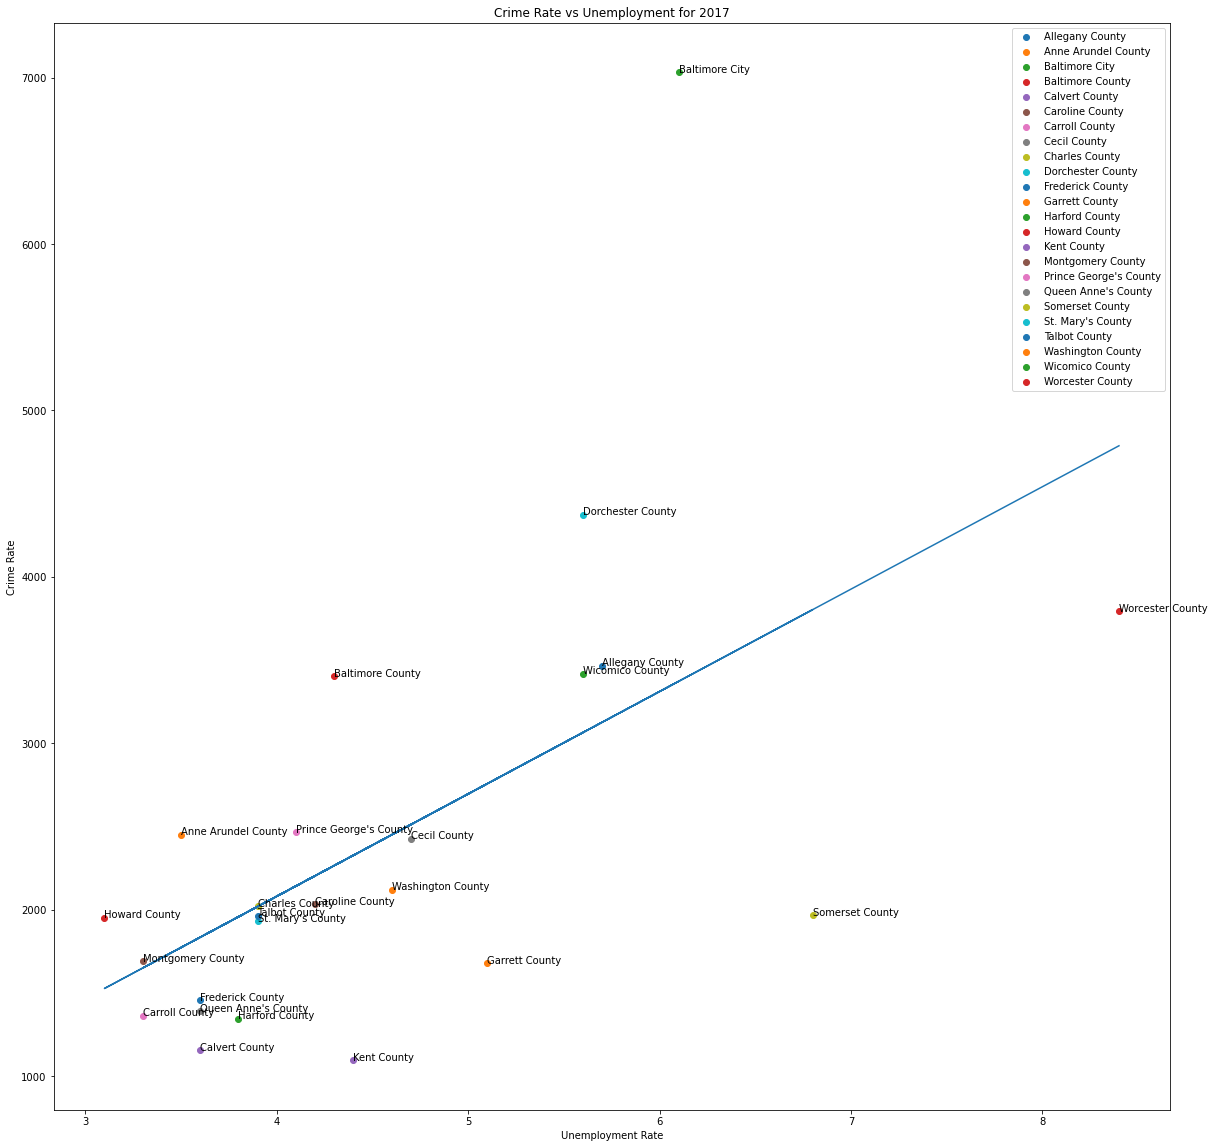

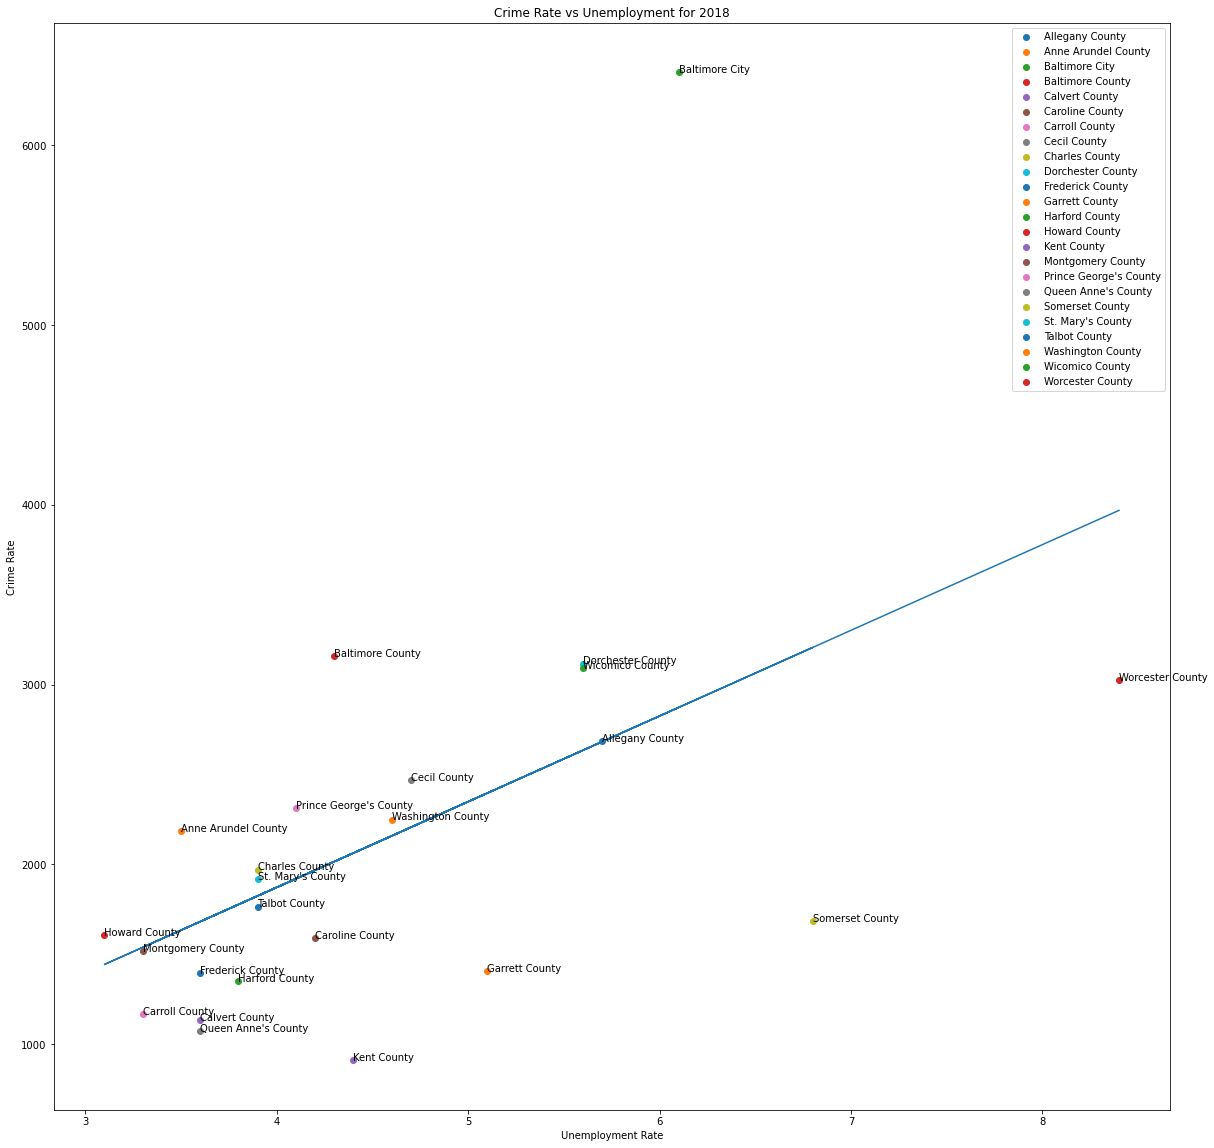

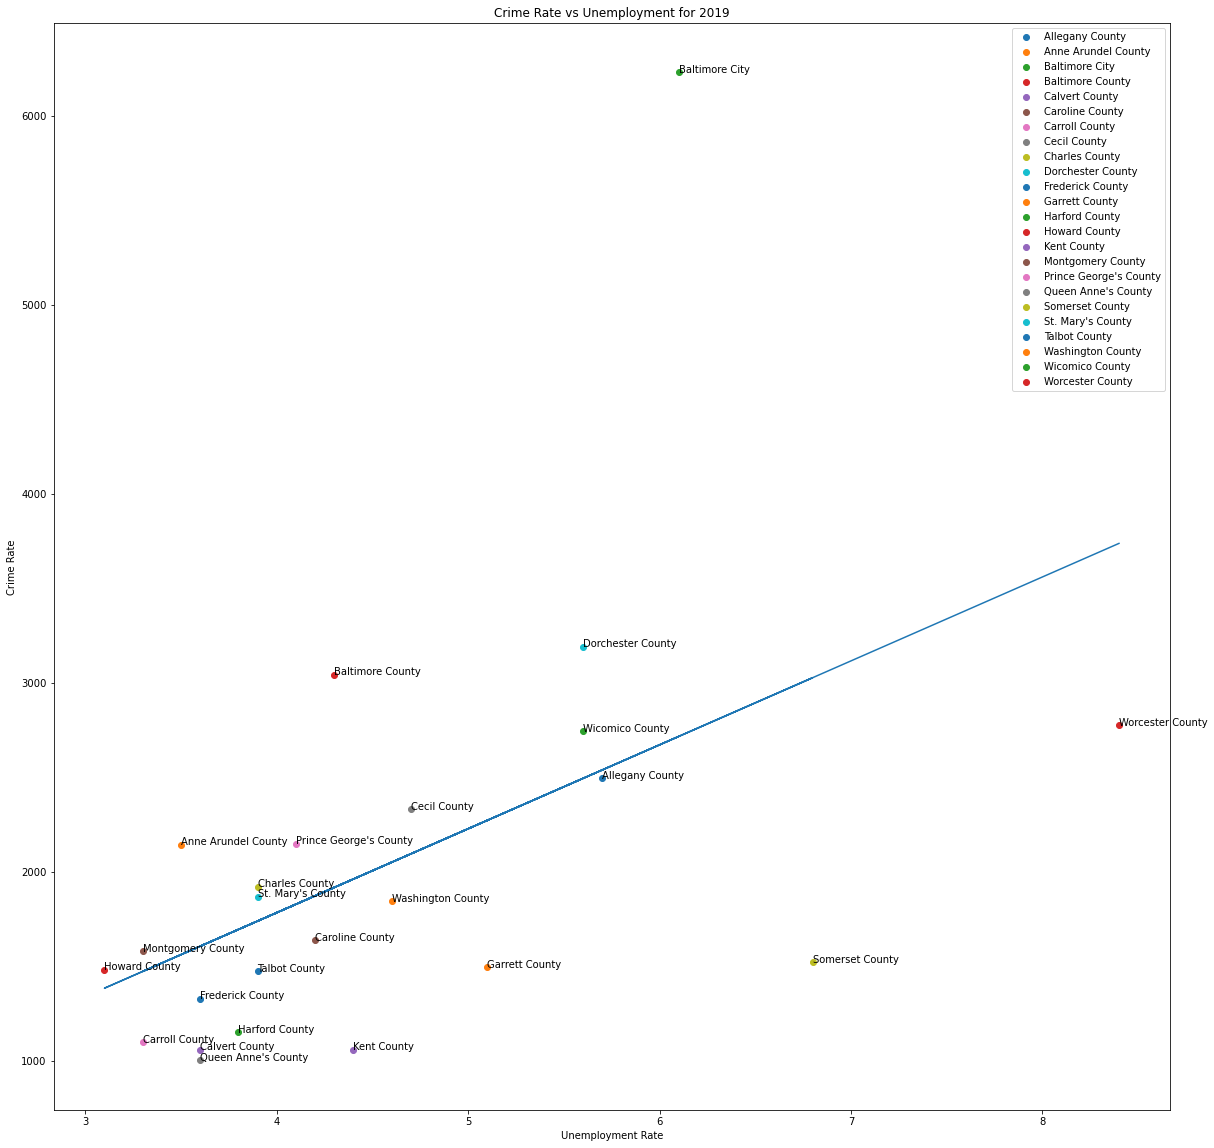

In [20]:
by_year = crime_df.groupby(crime_df['YEAR'])

index = 0   # must keep track of overall index in dataframe
for year in years: 
    group = by_year.get_group(year)
    plt.figure(figsize=(20, 20))
    
    # create scatter plot 
    for i in range(index, index+len(group)):
        plt.scatter(group['UNEMPLOYMENT'][i], group['OVERALL CRIME RATE PER 100,000 PEOPLE'][i])
        plt.annotate(group['JURISDICTION'][i], (group['UNEMPLOYMENT'][i], group['OVERALL CRIME RATE PER 100,000 PEOPLE'][i]))
    index = index + len(group)
    plt.xlabel('Unemployment Rate')
    plt.ylabel('Crime Rate')
    plt.legend(group['JURISDICTION'])
    plt.title("Crime Rate vs Unemployment for " + str(year))
    
    # add linear regression 
    z = np.polyfit(group['UNEMPLOYMENT'], group['OVERALL CRIME RATE PER 100,000 PEOPLE'], 1)
    linReg = np.poly1d(z)
    plt.plot(group['UNEMPLOYMENT'], linReg(group['UNEMPLOYMENT']), '-')
    plt.show()

Above are graphs depicting the relationship between the County's unemployment and its crime rate separated by year. Over the past years 2017, 2018, and 2019, one can see an overall trend. As the unemployment rate increases, the crime rate in that county increases. In order to further analyze this data, we will test the model via the Pearson Correlation method. This analytical method measures the linear dependance between the two variables.

In [21]:
# Get graph of crime rate vs unemployment per year
by_year = crime_df.groupby(crime_df['YEAR'])

# for each year, analyze the relationship trend
for year in years: 
    group = by_year.get_group(year)
    
    # render statistical analysis of regression
    x = group['UNEMPLOYMENT'].values.reshape(-1,1)
    y = group['OVERALL CRIME RATE PER 100,000 PEOPLE'].values.reshape(-1,1)
    reg = LinearRegression()
    reg.fit(x, y)
    print( '\033[1m' + "\nThe linear model for Crime rate vs Unemployment Rate in " + str(year) + " is:" + '\033[0m') 
    print("Y = {:.5} + {:.5}X".format(reg.intercept_[0], reg.coef_[0][0]))
    X2 = sm.add_constant(x)
    est = sm.OLS(y, X2)
    est2 = est.fit()
    print(est2.summary())


The linear model for Crime rate vs Unemployment Rate in 2017 is:
Y = -380.93 + 615.33X
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.354
Model:                            OLS   Adj. R-squared:                  0.325
Method:                 Least Squares   F-statistic:                     12.06
Date:                Sun, 15 May 2022   Prob (F-statistic):            0.00216
Time:                        16:35:27   Log-Likelihood:                -200.73
No. Observations:                  24   AIC:                             405.5
Df Residuals:                      22   BIC:                             407.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------

For this variable, we followed the same procedure in using the python's statsmodel library to run the correlation analysis. Above is the summary for each graph. For each year, the r-squared values were .354, .283, and .263 respectively. According to this value, only about three-tenths of the observed variation can be explained by the model. Using this value, r, we can then calculate the t value to evaluate the correlation between the variables. In the summaries, both the t and p values were calculated for each year. These values are for simple t tests where the null hypothesis that there is no correlation between the variables. The resulting p values were .002, .008, and .010 respectively. Therefore, on a 5% significance level, we can say there is correlation between crime rate and unemployment rate.  

# Linear Regression Model for 2018
Upon evaluating the individual impact of income, spending, and unemployment, on crime rate in Maryland counties, we found that income and unemployment directly affect crime rate whereas local funding does not. The next step is to further explore whether it is possible to create a more accurate model. In this section, we are creating a new linear regression model via machine learning while considering the interaction between the three variables. In order to do this, we used the LinearRegression modeling python library SKLearn. We decided to create two models and split up the data by year to compare the two models. This section is specific the data associated with 2018. 

To learn more about the regression modeling method used in this section go to:
https://medium.com/analytics-vidhya/implementing-linear-regression-using-sklearn-76264a3c073c

In [22]:
# get dataframes for only 2018 
crime_18 = crime_df.loc[crime_df['YEAR'] == 2018]
fund_18 = crime_18_19.loc[crime_18_19['YEAR'] == 2018]

table_18 = pd.merge(crime_18, fund_18[['JURISDICTION','FUNDING']], on='JURISDICTION', how="left")
table_18.head()

level_0  index         JURISDICTION  YEAR  \
0       72     41      Allegany County  2018   
1       75     88  Anne Arundel County  2018   
2       78    133       Baltimore City  2018   
3       81    178     Baltimore County  2018   
4       84    223       Calvert County  2018   

   OVERALL CRIME RATE PER 100,000 PEOPLE  INCOME  UNEMPLOYMENT  FUNDING  
0                                 2686.4   43535           5.7     3714  
1                                 2186.1   97051           3.5     8431  
2                                 6406.3   50501           6.1     3645  
3                                 3157.5   75836           4.3     7208  
4                                 1133.5  106270           3.6     7808

In [23]:
# create variables for model 
X = table_18[['INCOME',
              'UNEMPLOYMENT',
              'FUNDING']]
X = pd.get_dummies(data=X, drop_first=True)
Y = table_18['OVERALL CRIME RATE PER 100,000 PEOPLE']

X.head()

INCOME  UNEMPLOYMENT  FUNDING
0   43535           5.7     3714
1   97051           3.5     8431
2   50501           6.1     3645
3   75836           4.3     7208
4  106270           3.6     7808

Here, we are creating the x and y values to use in our regression. The Y values are simply the crime rate data as that is the variable, we are trying to get a prediction model for. The X values on the other hand are a combination of the Income, Unemployment, and Funding variables. To create a set of values that consider all three of these variables together, we create dummy variables. Dummy variables are numeric variables that represent categorical data, in this case, those are the income, unemployment, and funding.

In [24]:
# split data in to test and train data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=101)

model = LinearRegression()
model.fit(X_train,y_train)

coeff_parameter = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
coeff_parameter

Coefficient
INCOME           0.023129
UNEMPLOYMENT   747.638737
FUNDING         -0.182913

After creating the x and y values, we then split the data into the training set and the testing set. The training set is the data set that will be used to create the model. The testing set will be used to test the resulting model on its accuracy and precision. Here, we are inputting the training set into the Sklearn method to create the linear regression. After creating the model, we extract the coefficients which indicate the direction of the relationship between the predictor variables, or the income, unemployment, and funding, and the response variable, which is the crime rate. If the coefficient is positive, when the predictor variables increase, so does the crime rate. Conversely, if the coefficient is negative, when the predictor variables increase, the crime rate will decrease. According to these results, when the income and unemployment rate increases, the crime rate will increase, and when the funding increases, the crime rate will decrease. This is interesting because in the individual correlation tests, we found that income had a negative impact on crime rate, meaning as income increased, the crime rate would decrease. In this case, the magnitude of each coefficient is not a good comparison of correlation strength because the data was not normalized. By normalizing the data, the magnitudes could be used to compare each variables correlation strength.

Text(0.5, 1.0, 'Linear Regression of Crime Rate based on Income, Funding, and Unemployment for 2018')

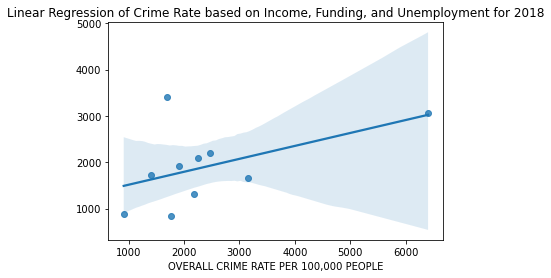

In [25]:
# plot model and predictions 
predictions = model.predict(X_test)
sns.regplot(x=y_test, y=predictions)
plt.title('Linear Regression of Crime Rate based on Income, Funding, and Unemployment for 2018')

The graph above represents the crime rate prediction model created in the previously. The line represents the linear regression model fit and the blue area around it represents the 95% confidence interval band.

To learn more about Seaborn RegPlots go to: 
https://medium.com/@kathy.lu.rentals/visualizing-with-seaborn-regplot-2235ccbaedd4

In [26]:
# render statistical siginicance of linear model
X_train_Sm= sm.add_constant(X_train)
X_train_Sm= sm.add_constant(X_train)
ls=sm.OLS(y_train,X_train_Sm).fit()
ls.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      OLS Regression Results                                     
=================================================================================================
Dep. Variable:     OVERALL CRIME RATE PER 100,000 PEOPLE   R-squared:                       0.747
Model:                                               OLS   Adj. R-squared:                  0.672
Method:                                    Least Squares   F-statistic:                     9.860
Date:                                   Sun, 15 May 2022   Prob (F-statistic):            0.00248
Time:                                           16:35:28   Log-Likelihood:                -102.69
No. Observations:                                     14   AIC:                             213.4
Df Residuals:                                         10   BIC:                             215.9
Df Model:                                              3                                         
Covariance Type:                               nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -1993.2171   1608.682     -1.239      0.244   -5577.583    1591.149
INCOME           0.0231      0.014      1.621      0.136      -0.009       0.055
UNEMPLOYMENT   747.6387    216.208      3.458      0.006     265.898    1229.380
FUNDING         -0.1829      0.080     -2.295      0.045      -0.361      -0.005
==============================================================================
Omnibus:                        2.622   Durbin-Watson:                   1.613
Prob(Omnibus):                  0.270   Jarque-Bera (JB):                1.046
Skew:                           0.079   Prob(JB):                        0.593
Kurtosis:                       1.670   Cond. No.                     1.14e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.14e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In order to evaluate the model and its effectiveness, we followed the same procedure in using the python's statsmodel library to run the correlation analysis. The first measurement we looked at is the adjusted r-squared value. While we used the basic r-squared value in the previous analyses, here we are using the adjusted r-squared value as it is based on the number of independent variables. This value measures how well the model fits the data. Here the adjusted r-squared value is .672. This shows that this model which includes all three variables is a much better predictor of crime rate. Another quantitative value we look at is the t value which determine the p values. Here both calculations are displayed in the summary. These values are for simple t tests where the null hypothesis that there is no correlation between the variables. Based on these readings, the p value for the Income variable is .136 which means there is a likely no correlation between crime rate and income on a 5% significance level. The p value for the Unemployment Rate variable is .006 which means there is a correlation between crime rate and the unemployment rate on a 5% significance level. Finally, the p value for the Funding variable is .045 which means there is a correlation between crime rate and the local funding on a 5% significance level.

# Create Model for 2019 
In this section, we are creating a new linear regression model via machine learning while considering the interaction between the three variables in 2019. As in the previous section, we used the LinearRegression modeling python library SKLearn. We continue to recreate the analysis of the previous year in order to confirm our findings. 

In [27]:
# get dataframes for only 2018 
crime_19 = crime_df.loc[crime_df['YEAR'] == 2019]
fund_19 = crime_18_19.loc[crime_18_19['YEAR'] == 2019]

table_19 = pd.merge(crime_19, fund_19[['JURISDICTION','FUNDING']], on='JURISDICTION', how="left")

# create variables for model 
X = table_19[['INCOME',
              'UNEMPLOYMENT', 
              'FUNDING']]
X = pd.get_dummies(data=X, drop_first=True)
Y = table_19['OVERALL CRIME RATE PER 100,000 PEOPLE']

# split data in to test and train data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=101)

# train model
model = LinearRegression()
model.fit(X_train,y_train)

coeff_parameter = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
coeff_parameter

Coefficient
INCOME           0.006297
UNEMPLOYMENT   477.991062
FUNDING         -0.100367

After creating the model, we find similar results to the model for 2018. According to these results, when the income and unemployment rate increases, the crime rate will increase, and when the funding increases, the crime rate will decrease. Again, this is interesting because in the individual correlation tests, we found that income had a negative impact on crime rate, meaning as income increased, the crime rate would decrease. 

Text(0.5, 1.0, 'Linear Regression of Crime Rate based on Income, Funding, and Unemployment for 2019')

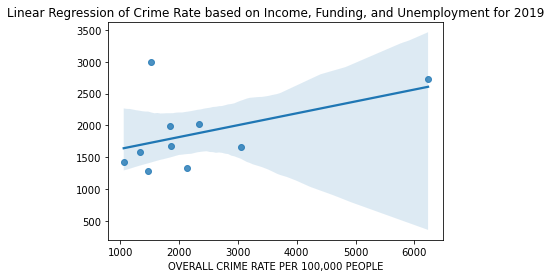

In [28]:
# plot model and predictions 
predictions = model.predict(X_test)
sns.regplot(x=y_test, y=predictions)
plt.title('Linear Regression of Crime Rate based on Income, Funding, and Unemployment for 2019')

In [29]:
# render statistical siginicance of linear model
X_train_Sm= sm.add_constant(X_train)
X_train_Sm= sm.add_constant(X_train)
ls=sm.OLS(y_train,X_train_Sm).fit()
ls.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      OLS Regression Results                                     
=================================================================================================
Dep. Variable:     OVERALL CRIME RATE PER 100,000 PEOPLE   R-squared:                       0.668
Model:                                               OLS   Adj. R-squared:                  0.569
Method:                                    Least Squares   F-statistic:                     6.710
Date:                                   Sun, 15 May 2022   Prob (F-statistic):            0.00927
Time:                                           16:35:29   Log-Likelihood:                -103.73
No. Observations:                                     14   AIC:                             215.5
Df Residuals:                                         10   BIC:                             218.0
Df Model:                                              3                                         
Covariance Type:                               nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         -132.2037   1949.009     -0.068      0.947   -4474.867    4210.460
INCOME           0.0063      0.017      0.367      0.721      -0.032       0.044
UNEMPLOYMENT   477.9911    255.847      1.868      0.091     -92.071    1048.053
FUNDING         -0.1004      0.097     -1.033      0.326      -0.317       0.116
==============================================================================
Omnibus:                        2.196   Durbin-Watson:                   1.145
Prob(Omnibus):                  0.334   Jarque-Bera (JB):                1.204
Skew:                           0.395   Prob(JB):                        0.548
Kurtosis:                       1.800   Cond. No.                     1.35e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.35e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

As in the previous section, we python's stats model library to run the correlation analysis. Looking at the adjusted r-squared value, we find that it is .569. This value is slightly lower than for the 2018 model but still similar. This shows that this model is also better predictor of crime rate than those which compare crime rate to only one variable at a time. Again, looking the p values, the p value for the Income variable is .721 which means there is no correlation between crime rate and income on a 5% significance level. The p value for the Unemployment Rate variable is .091 which means there is no correlation between crime rate and the unemployment rate on a 5% significance level, but there may be on a 10% significance level. These two variable evaluations are consistent with the previous model. However, the p value for the Funding variable is .326 which means there is no correlation between crime rate and the local funding on a 5% significance level in this model.

# 2 Variable Linear Regression Modification
In this section, we will explore how only including two of the three variables will impact the crime rate prediction model. We will use the same procedures as described in the previous two sections. We will model this regression using Income and Unemployment. We chose these variables because they had the strongest correlation when compared to crime rate individually and they were the most consistent during the three variable models.

In [30]:
# get dataframes for only 2018 
crime_19 = crime_df.loc[crime_df['YEAR'] == 2019]
fund_19 = crime_18_19.loc[crime_18_19['YEAR'] == 2019]

table_19 = pd.merge(crime_19, fund_19[['JURISDICTION','FUNDING']], on='JURISDICTION', how="left")

# create variables for model 
X = table_19[['INCOME',
              'UNEMPLOYMENT']]
X = pd.get_dummies(data=X, drop_first=True)
Y = table_19['OVERALL CRIME RATE PER 100,000 PEOPLE']

# split data in to test and train data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=101)

# train model
model = LinearRegression()
model.fit(X_train,y_train)

coeff_parameter = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
coeff_parameter

Coefficient
INCOME          -0.009659
UNEMPLOYMENT   252.426099

According to these results, when the unemployment rate increases, the crime rate will increase, and when income increases, the crime rate will decrease. This is not consistent with previous findings because in all other models, the income had a positive effect on the crime rate. These correlations are consistent with the findings from the individual correlation tests.

Text(0.5, 1.0, 'Linear Regression of Crime Rate based on Income, Funding, and Unemployment for 2019')

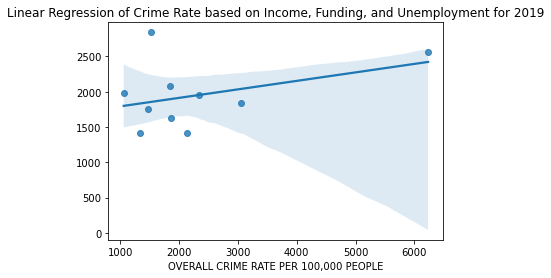

In [31]:
# plot model and predictions 
predictions = model.predict(X_test)
sns.regplot(x=y_test, y=predictions)
plt.title('Linear Regression of Crime Rate based on Income, Funding, and Unemployment for 2019')

In [32]:
# render statistical siginicance of linear model
X_train_Sm= sm.add_constant(X_train)
X_train_Sm= sm.add_constant(X_train)
ls=sm.OLS(y_train,X_train_Sm).fit()
ls.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      OLS Regression Results                                     
=================================================================================================
Dep. Variable:     OVERALL CRIME RATE PER 100,000 PEOPLE   R-squared:                       0.633
Model:                                               OLS   Adj. R-squared:                  0.566
Method:                                    Least Squares   F-statistic:                     9.474
Date:                                   Sun, 15 May 2022   Prob (F-statistic):            0.00405
Time:                                           16:35:30   Log-Likelihood:                -104.44
No. Observations:                                     14   AIC:                             214.9
Df Residuals:                                         11   BIC:                             216.8
Df Model:                                              2                                         
Covariance Type:                               nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1501.0216   1142.713      1.314      0.216   -1014.072    4016.115
INCOME          -0.0097      0.007     -1.300      0.220      -0.026       0.007
UNEMPLOYMENT   252.4261    133.662      1.889      0.086     -41.762     546.614
==============================================================================
Omnibus:                        1.640   Durbin-Watson:                   1.074
Prob(Omnibus):                  0.440   Jarque-Bera (JB):                0.860
Skew:                           0.078   Prob(JB):                        0.651
Kurtosis:                       1.796   Cond. No.                     7.86e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.86e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Looking at the adjusted r-squared value, we find that it is .566. While this value is less than the adjusted r-squared values from the three variable models, it is very close. This shows that the model considering all three variables is the best predictor of crime rate than those which compare crime rate to only one or two variables at a time. Looking the p values, the p value for the Income variable is .220 which means there is a no correlation between crime rate and income on a 5% significance level. The p value for the Unemployment Rate variable is .086 which means there is also no correlation between crime rate and the unemployment rate on a 5% significance level but there may be on a 10% significance level.

# Bubble Map of Crime Rate
This section plots the crime rate as a bubble map. This is another way to visualize the data. This new visualization could lead to other factors that could potentially affect crime rate besides just the ones previously evaluated. 

For the visual representation of crime rates per county we first import all the necessary tools that will be used. In this case we will use 
folium and json to process and display geographic data. Folium is a very useful tool since it can easily generate maps based on coordinates.
For the boundaries of each county, we first need to find a dataset with all the coordinates of each county. This can be found in 
https://public.opendatasoft.com/explore/dataset/us-county-boundaries/table/?disjunctive.statefp&disjunctive.countyfp&disjunctive.name&disjunctive.namelsad&disjunctive.stusab&disjunctive.state_name&refine.stusab=MD


In [33]:
# First create a new map by calling the function below. We need to specify the starting coordinates and the zoom level.
# For Maryland [38.9, -77.15] and a zoom level of 8 works well. 
map_osm = folium.Map(location=[38.9, -77.158862], zoom_start=8)

# Then we pass the geojson file to folium and add it to the map by calling the command below.
# This function draws the boundaries of each maryland county.
folium.GeoJson('md_counties.geojson').add_to(map_osm)
folium.LayerControl().add_to(map_osm)

# We also open the json file and read all the geographic information
with open('mdcounties.json') as handle:
    county_geo = json.loads(handle.read())

# For the display of the crime rate per county we first group all the data by county, this will make processing it easier. 
groups = crime_df.groupby('JURISDICTION')

# Now we iterate through every county in maryland (24 in total). For each on, we get the crime rate per 100,000 people and divide by a 
# factor of 150 (this was chosen randomly just to make visualization easier). There is a if statement in the loop because Baltimore city was 
# added with a lower case C for city in the json file. So to account for that without spending too much time modifying the actual file we have this
# if statement. We get the location and crime rate for each county and add it to the map by calling the CircleMarker function. In this function
# we specify the location (latitude and longitude), radius (based on crime rate), color, and add a pop up label so that when you click on the circle
# in the map it displays the name of the county (we chose this over actual labels for a better display and readability). Finally we return the map.
# In this case all counties circles were set to orange except Baltimore City (red) and Kent Count (green) for easier identification of each. These 
# two counties have the highest and lowest crime rates respectively.

for i in range(0,24):
    if(county_geo[i]['fields']['namelsad'] == "Baltimore city"):
        r = groups.get_group("Baltimore City")["OVERALL CRIME RATE PER 100,000 PEOPLE"].mean()
        r = r/150
        folium.CircleMarker(radius = r,location=[county_geo[i]['fields']['geo_point_2d'][0], county_geo[i]['fields']['geo_point_2d'][1]], color="red",fill=True).add_child(folium.Popup("Baltimore City " + "Crime: " + str(int(150*r)))).add_to(map_osm)
    else:
        r = groups.get_group(county_geo[i]['fields']['namelsad'])["OVERALL CRIME RATE PER 100,000 PEOPLE"].mean()
        r = r/150
        if(county_geo[i]['fields']['namelsad'] == "Kent County"):
            folium.CircleMarker(radius = r,location=[county_geo[i]['fields']['geo_point_2d'][0], county_geo[i]['fields']['geo_point_2d'][1]], color="green",fill=True).add_child(folium.Popup(county_geo[i]['fields']['name'] + " County " + "Crime: " + str(int(150*r)))).add_to(map_osm) 
        else:      
            folium.CircleMarker(radius = r,location=[county_geo[i]['fields']['geo_point_2d'][0], county_geo[i]['fields']['geo_point_2d'][1]], color="orange",fill=True).add_child(folium.Popup(county_geo[i]['fields']['name'] + " County " + "Crime: " + str(int(150*r)))).add_to(map_osm) 
map_osm

The graph above provides another way to see the data that we have been discussing so far. We have the state of Maryland broken into all of its 24 counties. In each county we also see a circle that is proportional to the crime rate of the state. It is possible to note that the largest amount of crime happens in the Baltimore city area (red circle), which makes sense by looking at the data for the area. From our data we see that Baltimore city has a low median household income and unemployment, based on these factors we would expect to see a higher crime rate for the area. On the other hand, Kent County (blue circle) has average income, low unemployment, and higher than average education spending which is why we predict it has the lowest average crime rate.

# Conclusion

In this project we set out with the idea of predicting crime rates based on 3 factors that we believed played a role in crime rates for states. Based on our analysis of the three different factors we can see that there is a correlation between them and the overall crime rate of a county, especially for unemployment and income. 

Analyzing the crime rate vs the factors individually we can see the correlation for income and unemployment but not for student spending. It is interesting to note that while statistical tests rejected the correlation of student spending and crime, including it in our machine learning model made it more accurate. This leads us to believe that while student spending is not directly correlated with crime it does seem to have some effect on it.

The fact that we could find no data for all the counties student spending before 2018 limited the extent of the analysis that we could do and potentially impacted the accuracy of our model. Ideally, we would have data for 10+ years, making it easier to see trends over a long period of time and decreasing the effects of outliers in the data. The fact that we couldn't find data for student spending for before 2018 shows finding good clean data is not an easy task, and while a lot of datasets are available for states it’s not as easy to find in state data.

Overall, our model was good at predicting the crime rate based on solely 3 factors, which leads us to believe that there are many more factors that contribute to a county's crime rate. In future research, it would be interesting to create a much more complex model that investigates some other factors that we believe can also be used to predict crime such as overall population of a county, population density, police budgets, high school graduation rates and other economic/monetary/social factors. Finally, it would also be interesting to see if counties with the same statistics have the same crime rates across the US or if US geographical location and culture plays a role in the crime rate of that specific county.